# Coordinates

In acoustics research, we often deal with different coordinate systems when handling sampling points, for example, microphone positions in a spherical microphone array or loudspeaker positions in a sound field synthesis system. This can get complicated. That's why we have the [pyfar.Coordinates](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html) . The class was designed for storing, working with, and accessing coordinate points. You can easily switch between different coordinate systems, rotate points, and do other useful operations.

In [1]:
import pyfar as pf
import numpy as np
%matplotlib inline

## Supported Coordinate systems

Common coordinate systems are the ``cartesian``, ``spherical`` and ``cylindrical`` systems, where different conventions exist for spherical coordinates. A coordinate system is defined by a set of coordinates, e.g. ``cartesian`` consists of the coordinates ``x``, ``y``, and ``z``.
Please have a look on the [documentation](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html), you will find a figure with all coordinate systems definitions.

Note that each coordinate has a unique name. If a coordinate is contained in multiple coordinate systems (e.g. 'z' in cartesian and cylindrical) this means the values for z are the same in both cases.

## Entering points

You can input points manually into the system. By default, the system assumes cartesian coordinates.

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

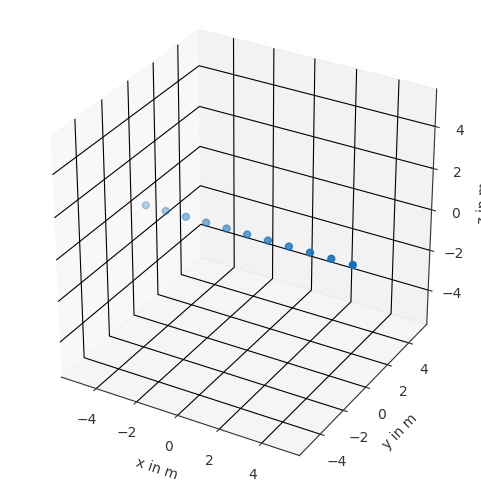

In [2]:
# create a coordinates object with x values from -5 to 5 any y and z values 0
c = pf.Coordinates(np.arange(-5, 6), 0, 0)
# plot the sampling points
c.show()

To initialize `Coordinates` objects for different coordinate systems, you can use specific constructors like `pf.Coordinates.from_spherical_elevation(azimuth, elevation, radius)`. The naming convention for these constructors is always `pf.Coordinates.from_coordinate_system(red, green, blue)`, where `coordinate_system` should be replaced with the desired coordinate system, and `red`, `green`, `blue` describe the order of the coordinate properties. The colors and the `coordinate_system` names can be found in the figure above. Remember, angles are always defined in radians.

For more details, you can refer to the [coordinate class documentation](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html).

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

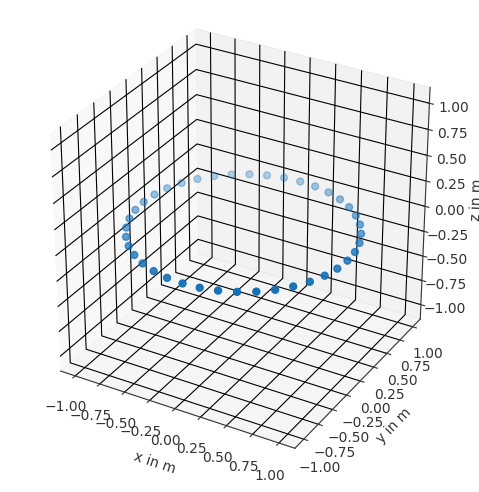

In [3]:
azimuth_angles = np.arange(0, 2*np.pi, np.pi/20)
c1 = pf.Coordinates.from_spherical_elevation(azimuth_angles, 0, 1)
c1.show()

## Meta data

In addition to the data points, coordinate objects also store meta data. Lets have a look by printing the coordinate object.


In [4]:
print(c1)

1D Coordinates object with 40 points of cshape (40,)

Does not contain sampling weights


We can observe that there are 40 coordinate points in the object. This refers to the attribute *coordinate size* or in short `csize`.


In [5]:
c1.csize

40

The *coordinate shape* or in short `cshape` of the data is (40,) and specifies how the 40 coordinate points are organized. In this case they are organized in a single dimension, but *Coordinates* of `csize = 40` could for example also be organized in a `cshape = (2, 20)` because the `csize` is the product of the `cshape`.

In [6]:
c1.cshape

(40,)

Similarly, `cdim` returns the number of dimensions of the coordinate points, which is given by the length of the `cshape` and is `1` in this case.

In [7]:
c1.cdim

1

The `cshape`, `csize`, and `cdim` attributes are similar to the [pyfar Audio classes](https://pyfar.readthedocs.io/en/stable/classes/pyfar.audio.html).


## Retrieving coordinate points

There are different ways to retrieve points from a `Coordinates` object. All points can be obtained in cartesian, spherical, and cylindrical coordinates using the related properties `c.cartesian`, `c.sperical_evaluation` and `c.cylindrical`.  Visit the [coordinate class](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html) for more details.

In [8]:
# access cartesian coordinates x, y, z
c.cartesian

array([[-5.,  0.,  0.],
       [-4.,  0.,  0.],
       [-3.,  0.,  0.],
       [-2.,  0.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.]])

We use Cartesian coordinates to store points internally. If you input points in a different coordinate system, we convert them to Cartesian coordinates before saving them. Similarly, if you request data in a different coordinate system, we convert it on the spot. Sometimes, these conversions can result in tiny numerical inaccuracies, typically around $10^{-16}$.

In [9]:
# access spherical coordinates azimuth, elevation, radius
c.spherical_elevation

array([[3.14159265, 0.        , 5.        ],
       [3.14159265, 0.        , 4.        ],
       [3.14159265, 0.        , 3.        ],
       [3.14159265, 0.        , 2.        ],
       [3.14159265, 0.        , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 2.        ],
       [0.        , 0.        , 3.        ],
       [0.        , 0.        , 4.        ],
       [0.        , 0.        , 5.        ]])

Note that angles are always returned in radian. We can convert from radian to degree by using [pyfar.rad2deg](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html#pyfar.classes.coordinates.rad2deg).

In [10]:
spherical_elevation_deg = pf.rad2deg(c.spherical_elevation)
spherical_elevation_deg

array([[180.,   0.,   5.],
       [180.,   0.,   4.],
       [180.,   0.,   3.],
       [180.,   0.,   2.],
       [180.,   0.,   1.],
       [  0.,   0.,   0.],
       [  0.,   0.,   1.],
       [  0.,   0.,   2.],
       [  0.,   0.,   3.],
       [  0.,   0.,   4.],
       [  0.,   0.,   5.]])

Or vice versa using [pyfar.deg2rad](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html#pyfar.classes.coordinates.deg2rad).

In [11]:
spherical_elevation_rad = pf.deg2rad(spherical_elevation_deg)
spherical_elevation_rad

array([[3.14159265, 0.        , 5.        ],
       [3.14159265, 0.        , 4.        ],
       [3.14159265, 0.        , 3.        ],
       [3.14159265, 0.        , 2.        ],
       [3.14159265, 0.        , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 2.        ],
       [0.        , 0.        , 3.        ],
       [0.        , 0.        , 4.        ],
       [0.        , 0.        , 5.        ]])

ALso, single properties of all implemented coordinate system conventions can be accessed, e.g. `azimuth`, `radius` or `x`. The `shape` of these numpy arrays equals the `cshape` of the Coordinates object.

In [12]:
c.azimuth

array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

## Manipulating points
the previous attributes can also be used to manipualte the data.

In [13]:
azimuth = c.azimuth
azimuth[0] = 0
c.azimuth = azimuth
c.azimuth

array([0.        , 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

## Accessing subsets
Different methods are available for obtaining a specific subset of coordinates.


### Find nearest
The first method is to find the subset of nearest points to a given point.

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

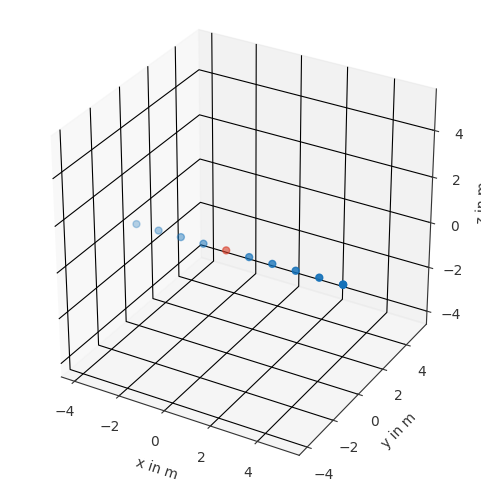

In [14]:
# find nearest points to x=0, y=-1, z=0
p = pf.Coordinates.from_cartesian(0, -1, 0)
index_out, distance = c.find_nearest(p)
c.show(index_out)

If we want to find the nearest 3 points, then we need to set `k=3`.

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

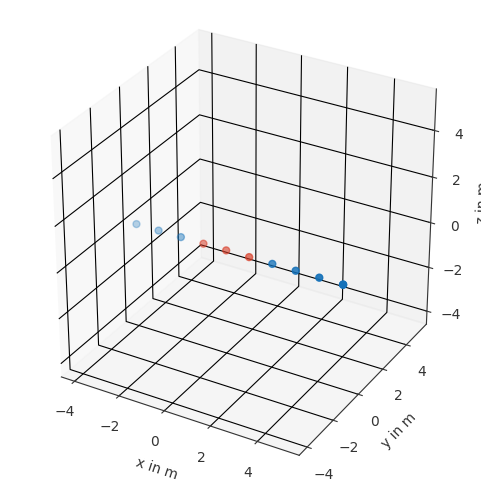

In [15]:
index_out, distance = c.find_nearest(p, k=3)
c.show([index_out[0], index_out[1], index_out[2]])

Note that the distance to the finding points is also returned.

In [16]:
distance

array([1.        , 1.41421356, 1.41421356])

Of course you can also get a copy of the points, if want to continue working just with the subset.

In [17]:
p_1 = c[index_out[1]]
p_1

1D Coordinates object with 1 points of cshape (1,)

Does not contain sampling weights

### Find within
Another option is to find all points within a certain distance. Different distance measures are available, see the [pyfar documentation](https://pyfar.readthedocs.io/en/stable/classes/pyfar.coordinates.html#pyfar.classes.coordinates.Coordinates.find_within) for more information.

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

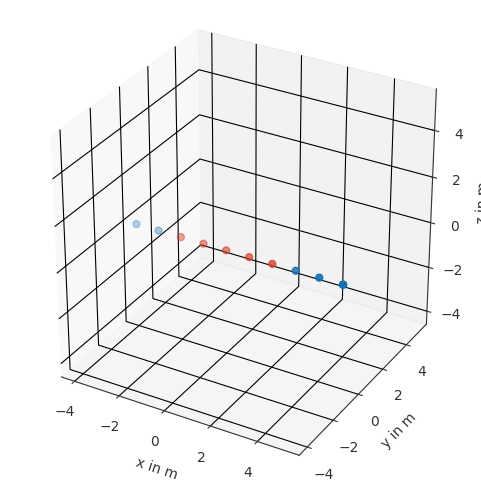

In [18]:
# Find all points within a distance of 3 from the point find
index_out = c.find_within(p, distance=3, distance_measure='euclidean')
c.show(index_out)

### Logical operations with attributes

Another way is to apply logical operations directly to the coordinate attributes.
As an example, we create a half arc. Then to obtain all points within a between 30° and 60° elevation, we just need to apply logical operations as follows.

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

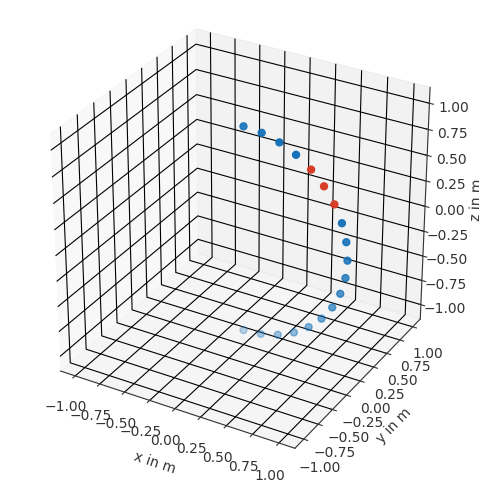

In [19]:
c2 = pf.Coordinates.from_spherical_colatitude(0, np.arange(0, 181, 10)*np.pi/180, 1)
index_out = (c2.elevation*180/np.pi >= 30) & (c2.elevation*180/np.pi <= 60)  
c2.show(np.where(index_out))

## Rotating coordinates

You can apply rotations using quaternions, rotation vectors/matrixes and euler angles with  `c.rotate()`, which is a wrapper for [scipy.spatial.transform.Rotation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html). For example, rotating around the y-axis by 45 degrees can be done with

<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

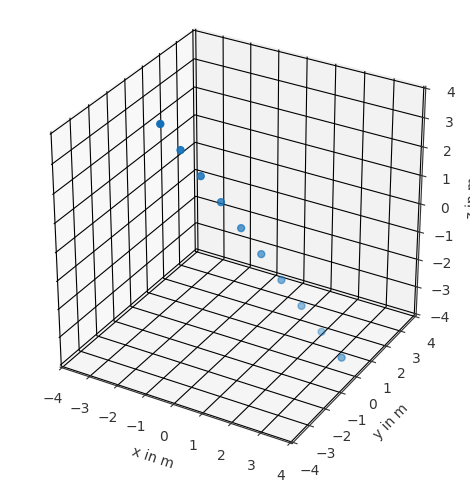

In [20]:
c.rotate('y', 45)
c.show()

Note that this **changes the points inside the** `Coordinates` **object**, which means that you have to be careful not to apply the rotation multiple times, i.e., when evaluationg cells during debugging.

# License notice
This notebook © 2024 by [the pyfar developers](https://github.com/orgs/pyfar/people) is licensed under [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1)

![CC BY Large](../../resources/cc-by.svg)


# Watermark

In [21]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.10.17
IPython version      : 8.37.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1029-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy: 2.2.6
pyfar: 0.7.3

